In [70]:
import numpy as np
import pandas as pd

import os
import pickle

import utm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

from collections import OrderedDict

In [71]:
class_major_check = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0)
class_major_check

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,molmass_K2O,moles_Al2O3,moles_CaO,moles_P2O5,moles_Na2O,moles_K2O,ASI_value,Na+K-Al,ASI,classificated
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,94.2,0.099398,0.009783,0.000070,0.032188,0.038015,1.244519,-0.029195,peraluminous,magnesian/calcic/peraluminous
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,94.2,0.099396,0.006262,0.000353,0.037235,0.054325,1.022257,-0.007836,peraluminous,magnesian/calcic/peraluminous
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,94.2,0.096960,0.002495,0.000070,0.012096,0.065261,1.216041,-0.019604,peraluminous,ferroan/calcic/peraluminous
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,94.2,0.093899,0.011865,0.000070,0.059448,0.044808,0.809447,0.010356,peralkaline,magnesian/calcic/peralkaline
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,94.2,0.099833,0.022157,0.000070,0.024378,0.032501,1.265003,-0.042953,peraluminous,ferroan/calcic/peraluminous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,94.2,0.190244,0.142696,0.004148,0.066327,0.021291,0.851634,-0.102627,metaluminous,magnesian/alkali-calcic/metaluminous
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,94.2,0.173734,0.150465,0.001827,0.042806,0.017365,0.836935,-0.113564,metaluminous,magnesian/calc-alkalic/metaluminous
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,94.2,0.176182,0.150122,0.003299,0.043080,0.023692,0.833467,-0.109410,metaluminous,magnesian/calc-alkalic/metaluminous
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,94.2,0.215009,0.167127,0.003228,0.065244,0.011525,0.901482,-0.138240,metaluminous,magnesian/calc-alkalic/metaluminous


# Fe-number

In [72]:
def Fe_number_classification(df):
    """Perform classification according to Fe-number cf. Miyasiro (1970)
    Classification results in 'ferroan' or 'magnesian'
    """
    
    # Calculate temporary variables needed for classification
    df["FeO/(FeO+MgO)"] = df["FeO"] / (df["FeO"] + df["MgO"])
    df["Miyashiro value"] = 0.446 + 0.0046 * df["SiO2"]
    df["Fe-miyashiro"] = df["FeO/(FeO+MgO)"] - df["Miyashiro value"]
    
    # Perform classification
    bins = [-99, 0, 99] # negative or positive
    cats = ["magnesian", "ferroan"] # classes
    # Assign classes to original dataframe
    df["Fe-number"] = pd.cut(df["Fe-miyashiro"], bins=bins, labels=cats)
    
    # Set Fe-number as categorical variable
    df["Fe-number"] = df["Fe-number"].astype("category").cat.reorder_categories(["ferroan", "magnesian"], ordered=True)

    # Drop temporary variables
    df = df.drop(["Miyashiro value", "Fe-miyashiro"], axis=1)
    
    return df

In [73]:
class_major_check = Fe_number_classification(class_major_check)

In [74]:
class_major_check

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,molmass_K2O,moles_Al2O3,moles_CaO,moles_P2O5,moles_Na2O,moles_K2O,ASI_value,Na+K-Al,ASI,classificated
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,94.2,0.099398,0.009783,0.000070,0.032188,0.038015,1.244519,-0.029195,peraluminous,magnesian/calcic/peraluminous
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,94.2,0.099396,0.006262,0.000353,0.037235,0.054325,1.022257,-0.007836,peraluminous,magnesian/calcic/peraluminous
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,94.2,0.096960,0.002495,0.000070,0.012096,0.065261,1.216041,-0.019604,peraluminous,ferroan/calcic/peraluminous
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,94.2,0.093899,0.011865,0.000070,0.059448,0.044808,0.809447,0.010356,peralkaline,magnesian/calcic/peralkaline
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,94.2,0.099833,0.022157,0.000070,0.024378,0.032501,1.265003,-0.042953,peraluminous,ferroan/calcic/peraluminous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,94.2,0.190244,0.142696,0.004148,0.066327,0.021291,0.851634,-0.102627,metaluminous,magnesian/alkali-calcic/metaluminous
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,94.2,0.173734,0.150465,0.001827,0.042806,0.017365,0.836935,-0.113564,metaluminous,magnesian/calc-alkalic/metaluminous
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,94.2,0.176182,0.150122,0.003299,0.043080,0.023692,0.833467,-0.109410,metaluminous,magnesian/calc-alkalic/metaluminous
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,94.2,0.215009,0.167127,0.003228,0.065244,0.011525,0.901482,-0.138240,metaluminous,magnesian/calc-alkalic/metaluminous


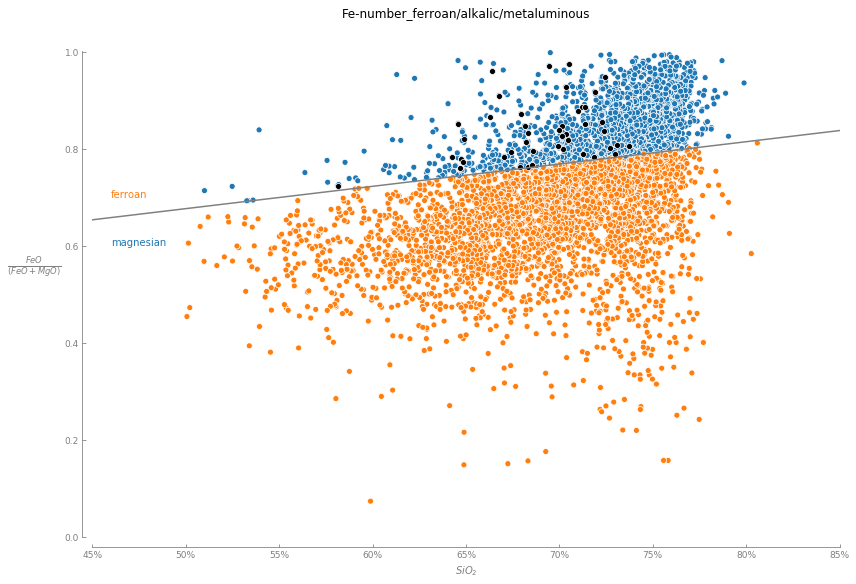

In [143]:
SiO2 = np.arange(0, 101, 1)

fig, ax = plt.subplots(figsize=(12, 8))

# Boundary line between ferroan an magnesian
ax.text(46, 0.7, "ferroan", color=sns.color_palette()[1])
ax.plot(SiO2, 0.446 + 0.0046 * SiO2, 'grey')
ax.text(46, 0.6, "magnesian", color=sns.color_palette()[0])

sns.scatterplot(x="SiO2" , y="FeO/(FeO+MgO)", data=class_major_check, hue="Fe-number", ax=ax, legend=False)
sns.scatterplot(x="SiO2", y="FeO/(FeO+MgO)", data=class_major_check.query("classificated == 'ferroan/alkalic/metaluminous'"), color='black', ax=ax, legend=False)

ax.set_xlim(45, 85)
ax.set_ylim(0, 1.06)

# Adjust spines
# # Set the bounds of the spines
spines = ['left', 'bottom']
for loc, spine in ax.spines.items():
    if loc in spines:
        spine.set_position(('outward', 10))  # outward by 10 points
        spine.set_smart_bounds(True)
        spine.set_color('grey')
    else:
        spine.set_color('none')  # don't draw spine

# Set general tick parameters
ax.tick_params(axis='both', direction='in', colors='grey', labelsize=9)

# Set facecolor of figure
plt.gcf().set_facecolor('white')

ax.set_ylabel(r'$\frac{FeO}{(FeO+MgO)}$', rotation=0, labelpad=30, color='grey', fontsize=12)
ax.set_xlabel(r'$SiO_{2}$', color='grey')

# Rewrite the x axis labels
x_labels = ax.get_xticks()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# # Display legend but reverse default order to be in line with figure
# handles, labels = ax.get_legend_handles_labels()
# # Store title entry
# handles_alt = handles[:1]
# labels_alt = labels[:1]
# # Extend title entry with legend entries in reverse order
# handles_alt.extend(reversed(handles[1:]))
# labels_alt.extend(reversed(labels[1:]))
# # Plot legend with altered handles and labels
# plt.legend(handles_alt, labels_alt, fontsize='small', loc='lower right')

plt.tight_layout()
plt.title('Fe-number_ferroan/alkalic/metaluminous')
plt.savefig("../_FIGURES/classification/checking/Fe-number_ferroan-alkalic-metaluminous.pdf")
plt.show();

# MALI (modified alkali-lime index) 

In [76]:
def MALI_classification(df):
    """Perform Modified Alkali-Lime Index classification based on Peacock (1931)
    Classification results in 'alkalic', 'alkali-calcic', 'calc-alkalic' or 'calcic'
    """
    
    df["Na2O+K2O-CaO"] = df["Na2O"] + df["K2O"] - df["CaO"]
    
    SiO2 = df["SiO2"]
    
    # Calculate boundary lines
    df["al_al-calc"] =      -41.86 + (1.1120 * SiO2) - (0.00572 * SiO2 ** 2)
    df["al-calc_calc-al"] = -44.72 + (1.0940 * SiO2) - (0.00527 * SiO2 ** 2)
    df["calc-al_calc"] =    -45.36 + (1.0043 * SiO2) - (0.00427 * SiO2 ** 2)

    df["al_al-calc_Bound"] = df["Na2O+K2O-CaO"] - df["al_al-calc"]
    df["al-calc_calc-al_Bound"] = df["Na2O+K2O-CaO"] - df["al-calc_calc-al"]
    df["calc-al_calc_Bound"] = df["Na2O+K2O-CaO"] - df["calc-al_calc"]
    
    # Perform classification
    df["MALI"] = np.where(df["calc-al_calc_Bound"] >= 0, 'calc-alkalic', 'calcic')
    df["MALI"] = np.where(df["al-calc_calc-al_Bound"]  >= 0, 'alkali-calcic', df["MALI"] )
    df["MALI"] = np.where(df["al_al-calc_Bound"] >= 0, 'alkalic', df["MALI"])
    
    # Set MALI as categorical variable
    df["MALI"] = df["MALI"].astype("category").cat.reorder_categories(["alkalic", "alkali-calcic", "calc-alkalic", "calcic"], ordered=True)

    # Drop temporary classification variables
    df = df.drop(["al_al-calc", "al-calc_calc-al", "calc-al_calc", 
                  "al_al-calc_Bound", "al-calc_calc-al_Bound", "calc-al_calc_Bound"], axis=1)
    
    return df

In [77]:
class_major_check = MALI_classification(class_major_check)
class_major_check

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,moles_Al2O3,moles_CaO,moles_P2O5,moles_Na2O,moles_K2O,ASI_value,Na+K-Al,ASI,classificated,MALI
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,0.099398,0.009783,0.000070,0.032188,0.038015,1.244519,-0.029195,peraluminous,magnesian/calcic/peraluminous,calcic
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,0.099396,0.006262,0.000353,0.037235,0.054325,1.022257,-0.007836,peraluminous,magnesian/calcic/peraluminous,calcic
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,0.096960,0.002495,0.000070,0.012096,0.065261,1.216041,-0.019604,peraluminous,ferroan/calcic/peraluminous,calcic
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,0.093899,0.011865,0.000070,0.059448,0.044808,0.809447,0.010356,peralkaline,magnesian/calcic/peralkaline,calcic
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,0.099833,0.022157,0.000070,0.024378,0.032501,1.265003,-0.042953,peraluminous,ferroan/calcic/peraluminous,calcic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,0.190244,0.142696,0.004148,0.066327,0.021291,0.851634,-0.102627,metaluminous,magnesian/alkali-calcic/metaluminous,alkali-calcic
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,0.173734,0.150465,0.001827,0.042806,0.017365,0.836935,-0.113564,metaluminous,magnesian/calc-alkalic/metaluminous,calc-alkalic
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,0.176182,0.150122,0.003299,0.043080,0.023692,0.833467,-0.109410,metaluminous,magnesian/calc-alkalic/metaluminous,calc-alkalic
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,0.215009,0.167127,0.003228,0.065244,0.011525,0.901482,-0.138240,metaluminous,magnesian/calc-alkalic/metaluminous,calc-alkalic


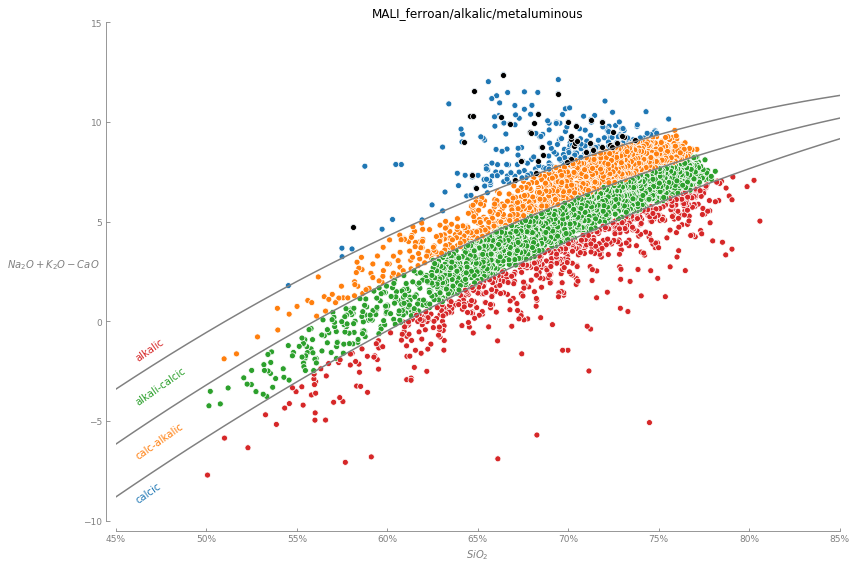

In [118]:
SiO2 = np.arange(0, 101, 1)

fig, ax = plt.subplots(figsize=(12, 8))

text_rot_angle = 35

# boundary between alkalic and alkali-calcic
ax.text(46, -2, "alkalic", color=sns.color_palette()[3], rotation=text_rot_angle)
ax.plot(-41.86 + 1.112 * SiO2 - (0.00572 * SiO2 * SiO2), color='grey')
ax.text(46, -4.2, "alkali-calcic", color=sns.color_palette()[2], rotation=text_rot_angle)

# boundary between alkali-calcic and calc-alkalic
ax.plot(-44.72 + 1.094 * SiO2 - (0.00527 * SiO2 * SiO2), color='grey')
ax.text(46, -6.9, "calc-alkalic", color=sns.color_palette()[1], rotation=text_rot_angle)

# boundary between calc-alkalic and calcic
ax.plot(-45.36 + 1.0043 * SiO2 - (0.00427 * SiO2 * SiO2), color='grey')
ax.text(46, -9.1, "calcic", color=sns.color_palette()[0], rotation=text_rot_angle)

sns.scatterplot(x="SiO2", y="Na2O+K2O-CaO", data=class_major_check, hue='MALI', ax=ax, legend=False)
sns.scatterplot(x="SiO2", y="Na2O+K2O-CaO", data=class_major_check.query("classificated == 'ferroan/alkalic/metaluminous'"), color='black', ax=ax, legend=False)


# Check first sample
# plt.scatter(class_major.loc[1, "SiO2"], class_major.loc[1, "Na2O+K2O-CaO"], color="r", zorder=10)
# Check last sample
# plt.scatter(class_major.loc[4659, "SiO2"], class_major.loc[4659, "Na2O+K2O-CaO"], color="r", zorder=10)

ax.set_xlim((45, 85))
ax.set_ylim((-10, 15))

# Adjust spines
# # Set the bounds of the spines
spines = ['left', 'bottom']
for loc, spine in ax.spines.items():
    if loc in spines:
        spine.set_position(('outward', 10))  # outward by 10 points
        spine.set_smart_bounds(True)
        spine.set_color('grey')
    else:
        spine.set_color('none')  # don't draw spine

# Set general tick parameters
ax.tick_params(axis='both', direction='in', colors='grey', labelsize=9)

# Set facecolor of figure
plt.gcf().set_facecolor('white')

ax.set_ylabel(r'$Na_{2}O+K_{2}O-CaO$', rotation=0, labelpad=30, color='grey')
ax.set_xlabel(r'$SiO_{2}$', color='grey')
plt.title('MALI_ferroan/alkalic/metaluminous')

# Rewrite the x axis labels
x_labels = ax.get_xticks()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# # Display legend but reverse default order to be in line with figure
# handles, labels = ax.get_legend_handles_labels()
# # Store title entry
# handles_alt = handles[:1]
# labels_alt = labels[:1]
# # Extend title entry with legend entries in reverse order
# handles_alt.extend(reversed(handles[1:]))
# labels_alt.extend(reversed(labels[1:]))
# # Plot legend with altered handles and labels
# plt.legend(handles_alt, labels_alt, fontsize='small', loc='lower right')

plt.tight_layout()

plt.savefig("../_FIGURES/classification/checking/MALI_ferroan-alkalic-metaluminous.pdf")
plt.show();

# ASI (aluminum saturation index) 

In [144]:
def ASI_classification(df):
    """Perform Aluminium Saturation Index classification according to Shand (1943)
    Classification results in 'peraluminous', 'metaluminous' or 'peralkaline'
    """
    
    # Define molar masses of oxides
    molar_mass = {"Al2O3": (2 * 26.98 + 3 * 16.00),
                  "CaO"  : (40.08 + 16.00),
                  "P2O5" : (2 * 30.97 + 5 * 16.00),
                  "Na2O" : (2 * 22.99 + 16.00),
                  "K2O"  : (2* 39.10 + 16.00),
                   }
    
    # Calculate moles per oxide
    df['moles_Al2O3'] = df['Al2O3'] / molar_mass['Al2O3']
    df['moles_CaO'] = df['CaO'] / molar_mass['CaO']
    df['moles_P2O5'] = df['P2O5'] / molar_mass['P2O5'] 
    df['moles_Na2O'] = df['Na2O'] / molar_mass['Na2O']
    df['moles_K2O'] = df['K2O'] / molar_mass['K2O']
    
    # Calculat ASI value and Na+K-Al value
    df["ASI_value"] = df["moles_Al2O3"]/(df["moles_CaO"] - 1.67 * df["moles_P2O5"] + df["moles_Na2O"] + df["moles_K2O"])
    df["Na+K-Al"] = df["moles_Na2O"] + df["moles_K2O"] - df["moles_Al2O3"]
    
    # Perform classification
    df["ASI"] = np.where(df["Na+K-Al"]  < 0, 'metaluminous', 'peralkaline')
    df["ASI"] = np.where(df["ASI_value"] >= 1, 'peraluminous', df["ASI"])
    
    # Set ASI as categorical variable
    df["ASI"] = df["ASI"].astype("category").cat.reorder_categories(["peralkaline", "metaluminous", "peraluminous"], ordered=True)
    
    # Drop temporary variables
    df = df.drop(["moles_Al2O3", "moles_CaO", "moles_P2O5", "moles_Na2O", "moles_K2O"], axis=1)
    
    return df

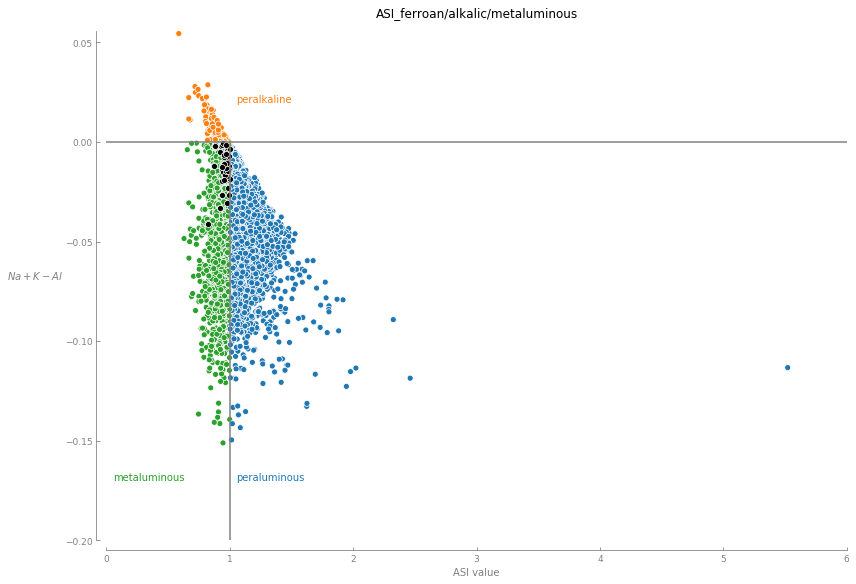

In [171]:
for Fe-number in ["magnesian", "ferroan"]:
    for MALI in ["alkalic", "alkali-calcic", "calc-alkalic", "calcic"]:
        for ASI in ["peralkaline", "metaluminous", "peraluminous"]:
            fg, ax = plt.subplots(figsize=(12, 8))

            # Boundary between peralkaline and (metaluminous/peralumnious)
            ax.text(1.05, 0.02, "peralkaline", color=sns.color_palette()[1])
            ax.hlines(0, 0, 6, color='grey')

            # Boundary between metalumnous and peraluminous
            ax.text(0.05, -0.17, "metaluminous", color=sns.color_palette()[2])
            ax.vlines(1, -0.20, 0, color='grey')
            ax.text(1.05, -0.17, "peraluminous", color=sns.color_palette()[0])

            sns.scatterplot(x="ASI_value", y="Na+K-Al", data=class_major_check, hue="ASI", legend=False)
            # sns.scatterplot(x="ASI_value", y="Na+K-Al", data=class_major_check.query("classificated == 'ferroan/alkalic/metaluminous'"), color='black', ax=ax, legend=False)
            sns.scatterplot(x="ASI_value", y="Na+K-Al", data=class_major_check.query(f"classificated == '{Fe-number}/{MALI}/{ASI}'"), color='black', ax=ax, legend=False)


            ax.set_xlim((0, 6))
            ax.set_ylim((-0.20, 0.06))

            # Adjust spines
            # # Set the bounds of the spines
            spines = ['left', 'bottom']
            for loc, spine in ax.spines.items():
                if loc in spines:
                    spine.set_position(('outward', 10))  # outward by 10 points
                    spine.set_smart_bounds(True)
                    spine.set_color('grey')
                else:
                    spine.set_color('none')  # don't draw spine

            # Set general tick parameters
            ax.tick_params(axis='both', direction='in', colors='grey', labelsize=9)

            # Set facecolor of figure
            plt.gcf().set_facecolor('white')

            ax.set_ylabel(r'$Na+K-Al$', rotation=0, labelpad=30, color='grey')
            ax.set_xlabel('ASI value', color='grey')
            # plt.title('MALI')

            # # Display legend but reverse default order to be in line with figure
            # handles, labels = ax.get_legend_handles_labels()
            # # Store title entry
            # handles_alt = handles[:1]
            # labels_alt = labels[:1]
            # # Extend title entry with legend entries in reverse order
            # handles_alt.extend(reversed(handles[1:]))
            # labels_alt.extend(reversed(labels[1:]))
            # # Plot legend with altered handles and labels
            # plt.legend(handles_alt, labels_alt, fontsize='small', loc='lower right')

            plt.tight_layout()
            plt.title(f'ASI_{Fe-number}/{MALI}/{ASI}')
            plt.savefig(f"../_FIGURES/classification/checking/ASI_{Fe-number}/{MALI}/{ASI}.pdf")

            plt.show();

# checking sampler

In [204]:
class_check_sampler1 = pd.read_excel("../_PETRO/classificated.xlsx", index_col=0, usecols=[0, 5, 6, 7, 21, 25, 26, 27, 38,39])
class_check_sampler2 = pd.read_excel("../_RESULTS/working_data.xlsx", index_col=0, usecols=[0, 10, 11, 13])
class_check_sampler3 = pd.read_excel("../_DATA/full_with_coordinates.xlsx", index_col=0, usecols=[0, 17])

In [205]:
class_check_sampler = pd.concat([class_check_sampler1, class_check_sampler3, class_check_sampler2], axis = 1)

In [206]:
class_check_sampler

,Latitude,Longitude,past_mer,l.i.,time,Fe-number,Mali,ASI,classificated,sum,massif,sampler,sampler+year
1,"44°31'30.0""","138°37'30.0""",NaN,0.349127,K2,magnesian,calcic,peraluminous,magnesian/calcic/peraluminous,100.22,NaN,NaN,"V.N.Musin,1970"
2,"54°12'10.0""","119°24'0.0""",NaN,0.501706,Tr,magnesian,calcic,peraluminous,magnesian/calcic/peraluminous,99.65,NaN,V.I.Zhigalova,"E.A.Ivanov,1969"
3,"62°36'0.0""","155°36'0.0""",NaN,1.019592,K2,ferroan,calcic,peraluminous,ferroan/calcic/peraluminous,100.03,Omsukchan massif,P.M.Bosek,"O.S.Gracheva,1948"
4,"61°35'0.0""","146°2'0.0""",NaN,0.258218,K1,magnesian,calcic,peralkaline,magnesian/calcic/peralkaline,100.67,Buksandzhin massif,A.Kh.Brovtman,"A.F.Mikhaylov,1948"
5,"68°55'0.0""","164°24'0.0""",NaN,1.739563,K1,ferroan,calcic,peraluminous,ferroan/calcic/peraluminous,100.60,Attykveem massif,L.G.Semenova,"A.I.Sadovsky,1963"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,"66°42'0.0""","164°23'0.0""",NaN,1.476751,K1,magnesian,alkali-calcic,metaluminous,magnesian/alkali-calcic/metaluminous,100.21,Egdegkych massif,NaN,"V.A.lgnat'ev,1964"
4656,"46°56'30.0""","137°5'3.0""",NaN,0.797925,K2,magnesian,calc-alkalic,metaluminous,magnesian/calc-alkalic/metaluminous,100.25,Verkhneplotnikovsky massif,NaN,"A.A.Syas'ko,1969"
4657,"58°12'0.0""","138°12'0.0""",NaN,1.484507,J3,magnesian,calc-alkalic,metaluminous,magnesian/calc-alkalic/metaluminous,100.37,NaN,NaN,"N.N.Remizov,1967"
4658,"60°51'0.0""","147°31'0.0""",NaN,2.589641,K2,magnesian,calc-alkalic,metaluminous,magnesian/calc-alkalic/metaluminous,100.39,NaN,NaN,"A.P.Osipov,1966"


In [207]:
class_check_sampler.to_excel("../_PETRO/Checking_sampler.xlsx")